In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import torchvision.transforms as T
import torch
from torch.functional import F


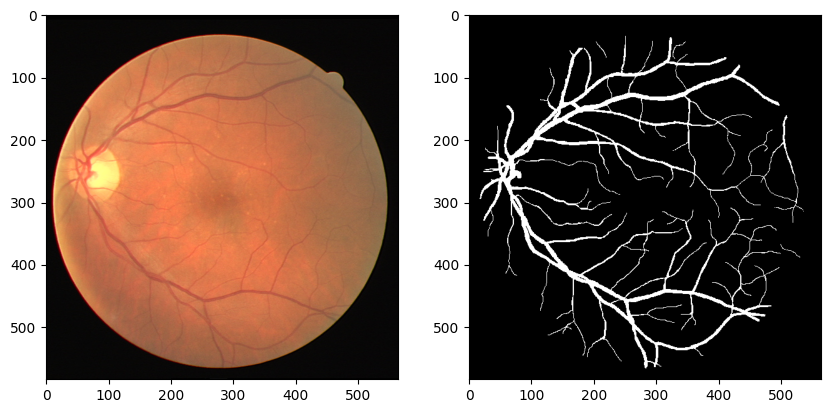

In [7]:
#load and plot a .tif image
img = Image.open('../datasets/drive/training/images/21_training.tif')
seg = Image.open('../datasets/drive/training/1st_manual/21_manual1.gif')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[1].imshow(seg, cmap='gray')
plt.show()


In [13]:
file_list = list(sorted(os.listdir('../datasets/drive/training/images')))
print(file_list)

['21_training.tif', '22_training.tif', '23_training.tif', '24_training.tif', '25_training.tif', '26_training.tif', '27_training.tif', '28_training.tif', '29_training.tif', '30_training.tif', '31_training.tif', '32_training.tif', '33_training.tif', '34_training.tif', '35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']


In [14]:
img_list = pd.Series(file_list).apply(lambda x: '../datasets/drive/training/images/' + x)
img_list

0     ../datasets/drive/training/images/21_training.tif
1     ../datasets/drive/training/images/22_training.tif
2     ../datasets/drive/training/images/23_training.tif
3     ../datasets/drive/training/images/24_training.tif
4     ../datasets/drive/training/images/25_training.tif
5     ../datasets/drive/training/images/26_training.tif
6     ../datasets/drive/training/images/27_training.tif
7     ../datasets/drive/training/images/28_training.tif
8     ../datasets/drive/training/images/29_training.tif
9     ../datasets/drive/training/images/30_training.tif
10    ../datasets/drive/training/images/31_training.tif
11    ../datasets/drive/training/images/32_training.tif
12    ../datasets/drive/training/images/33_training.tif
13    ../datasets/drive/training/images/34_training.tif
14    ../datasets/drive/training/images/35_training.tif
15    ../datasets/drive/training/images/36_training.tif
16    ../datasets/drive/training/images/37_training.tif
17    ../datasets/drive/training/images/38_train

In [16]:
seg_list = pd.Series(file_list).apply(lambda x: '../datasets/drive/training/1st_manual/' + x.split('_')[0] + '_manual1.gif')
seg_list

0     ../datasets/drive/training/1st_manual/21_manua...
1     ../datasets/drive/training/1st_manual/22_manua...
2     ../datasets/drive/training/1st_manual/23_manua...
3     ../datasets/drive/training/1st_manual/24_manua...
4     ../datasets/drive/training/1st_manual/25_manua...
5     ../datasets/drive/training/1st_manual/26_manua...
6     ../datasets/drive/training/1st_manual/27_manua...
7     ../datasets/drive/training/1st_manual/28_manua...
8     ../datasets/drive/training/1st_manual/29_manua...
9     ../datasets/drive/training/1st_manual/30_manua...
10    ../datasets/drive/training/1st_manual/31_manua...
11    ../datasets/drive/training/1st_manual/32_manua...
12    ../datasets/drive/training/1st_manual/33_manua...
13    ../datasets/drive/training/1st_manual/34_manua...
14    ../datasets/drive/training/1st_manual/35_manua...
15    ../datasets/drive/training/1st_manual/36_manua...
16    ../datasets/drive/training/1st_manual/37_manua...
17    ../datasets/drive/training/1st_manual/38_m

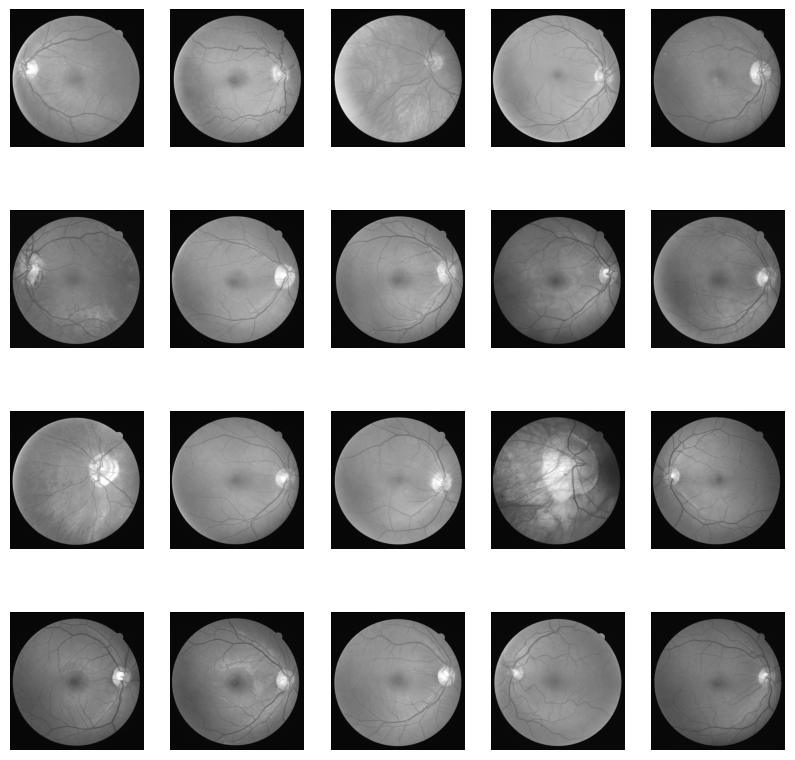

In [44]:
img_tensor = []
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
ax = ax.ravel()
for i,file in enumerate(img_list):
    img = Image.open(file)
    #grey scale
    img = T.Grayscale(num_output_channels=1)(img)
    img_tensor.append(T.ToTensor()(img))
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
plt.show()



In [35]:
img_tensor

[tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0353, 0.0314, 0.0275,  ..., 0.0275, 0.0275, 0.0275],
          [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0275, 0.0235],
          [0.0275, 0.0235, 0.0275,  ..., 0.0000, 0.0039, 0.0039]]]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0000],
          ...,
          [0.0235, 0.0235, 0.0235,  ..., 0.0314, 0.0314, 0.0235],
          [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0235, 0.0275],
          [0.0275, 0.0275, 0.0275,  ..., 0.0000, 0.0000, 0.0000]]]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

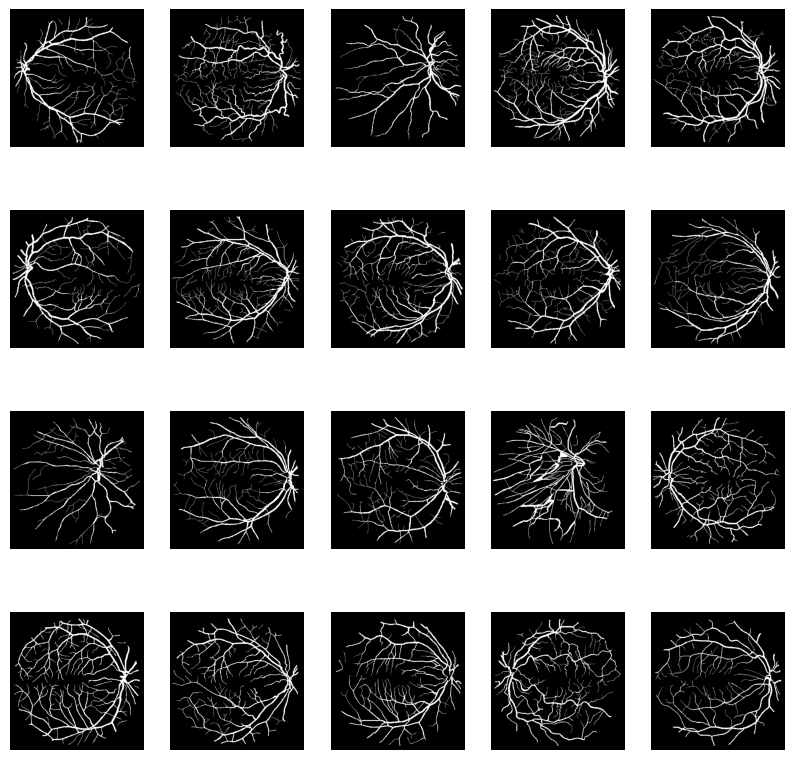

In [36]:
seg_tensor = []
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
ax = ax.ravel()
for i,file in enumerate(seg_list):
    img = Image.open(file)
    seg_tensor.append(T.ToTensor()(img))
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
plt.show()


In [55]:
def nomalize(img_list):
    imgs = torch.cat(img_list, dim=0)
    mean = torch.mean(imgs)
    std = torch.std(imgs)
    nomalized = []
    for img in img_list:
        n = T.Normalize(mean=mean, std=std)(img)
        n = (n - torch.min(n)) / (torch.max(n) - torch.min(n))
        nomalized.append(n)
    return nomalized

In [56]:
img_tensor_normalized = nomalize(img_tensor)
img_tensor_normalized

[tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0370, 0.0329, 0.0288,  ..., 0.0288, 0.0288, 0.0288],
          [0.0288, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0247],
          [0.0288, 0.0247, 0.0288,  ..., 0.0000, 0.0041, 0.0041]]]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0046, 0.0046, 0.0000],
          ...,
          [0.0276, 0.0276, 0.0276,  ..., 0.0369, 0.0369, 0.0276],
          [0.0323, 0.0323, 0.0323,  ..., 0.0323, 0.0276, 0.0323],
          [0.0323, 0.0323, 0.0323,  ..., 0.0000, 0.0000, 0.0000]]]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

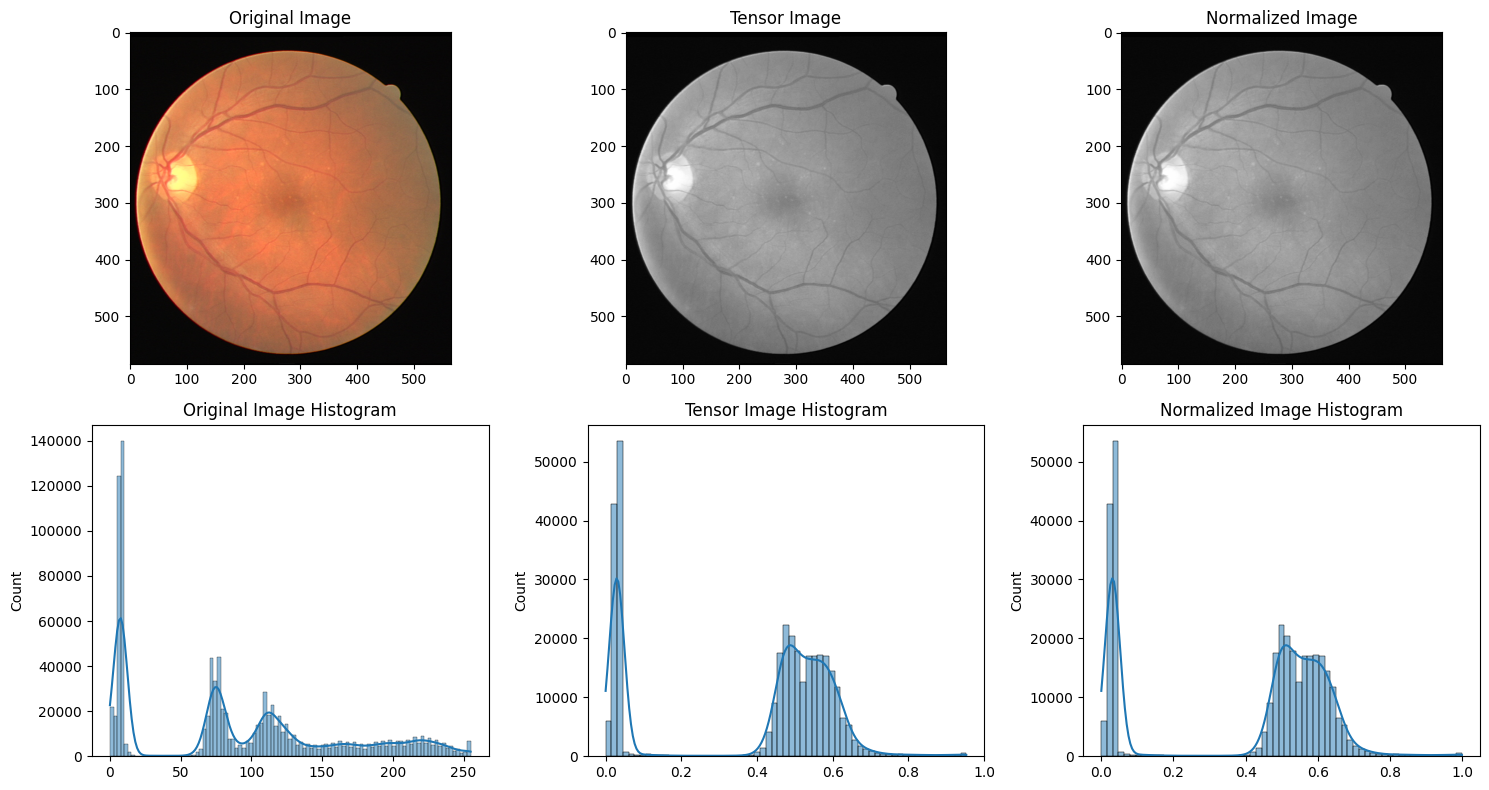

In [57]:
# Create a 2x3 grid of subplots with specified figure size
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Display the original image
axes[0].imshow(Image.open(img_list[0]))
axes[0].set_title('Original Image')

# Display the tensor image
axes[1].imshow(img_tensor[0].numpy().transpose(1, 2, 0), cmap='gray')
axes[1].set_title('Tensor Image')

# Display the normalized tensor image
axes[2].imshow(img_tensor_normalized[0].numpy().transpose(1, 2, 0), cmap='gray')
axes[2].set_title('Normalized Image')

# Plot the histogram of the original image
sns.histplot(np.array(Image.open(img_list[0])).flatten(), kde=True, ax=axes[3])
axes[3].set_title('Original Image Histogram')

# Plot the histogram of the tensor image
sns.histplot(img_tensor[0].numpy().flatten(), kde=True, ax=axes[4])
axes[4].set_title('Tensor Image Histogram')

# Plot the histogram of the normalized tensor image
sns.histplot(img_tensor_normalized[0].numpy().flatten(), kde=True, ax=axes[5])
axes[5].set_title('Normalized Image Histogram')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()



In [81]:
def patchify(img_list, patch_size, stride):
    """
    Extracts patches from a list of images using the specified patch size and stride.

    Parameters:
    img_list (list of tensors): List of images as tensors with shape (C, H, W).
    patch_size (int): Size of the square patches to extract.
    stride (int): Stride or step size for patch extraction.

    Returns:
    list of tensors: List of image patches with shape (C, patch_size, patch_size).
    """
    patches = []
    _, h, w = img_list[0].shape  # Assumes all images in the list have the same shape

    # Calculate padding needed to ensure complete patches are extracted
    pad_h = (stride - (h - patch_size) % stride) % stride
    pad_w = (stride - (w - patch_size) % stride) % stride

    for img in img_list:
        # Pad the image to ensure complete patch extraction
        padded_img = F.pad(img, (0, pad_w, 0, pad_h), "constant", 0)
        
        # Extract patches by unfolding the image tensor
        patches_tensor = padded_img.unfold(1, patch_size, stride).unfold(
            2, patch_size, stride).permute(1, 2, 0, 3, 4)
        
        # Reshape to have a list of patches
        patches_tensor = patches_tensor.contiguous().view(
            -1, img.shape[0], patch_size, patch_size)
        
        # Append patches to the list
        patches.extend(patches_tensor)

    return patches

In [82]:
patch_imgs = patchify(img_tensor_normalized, 48, 6)
patch_segs = patchify(seg_tensor, 48, 6)

In [83]:
len(patch_imgs), len(patch_segs)

(160160, 160160)

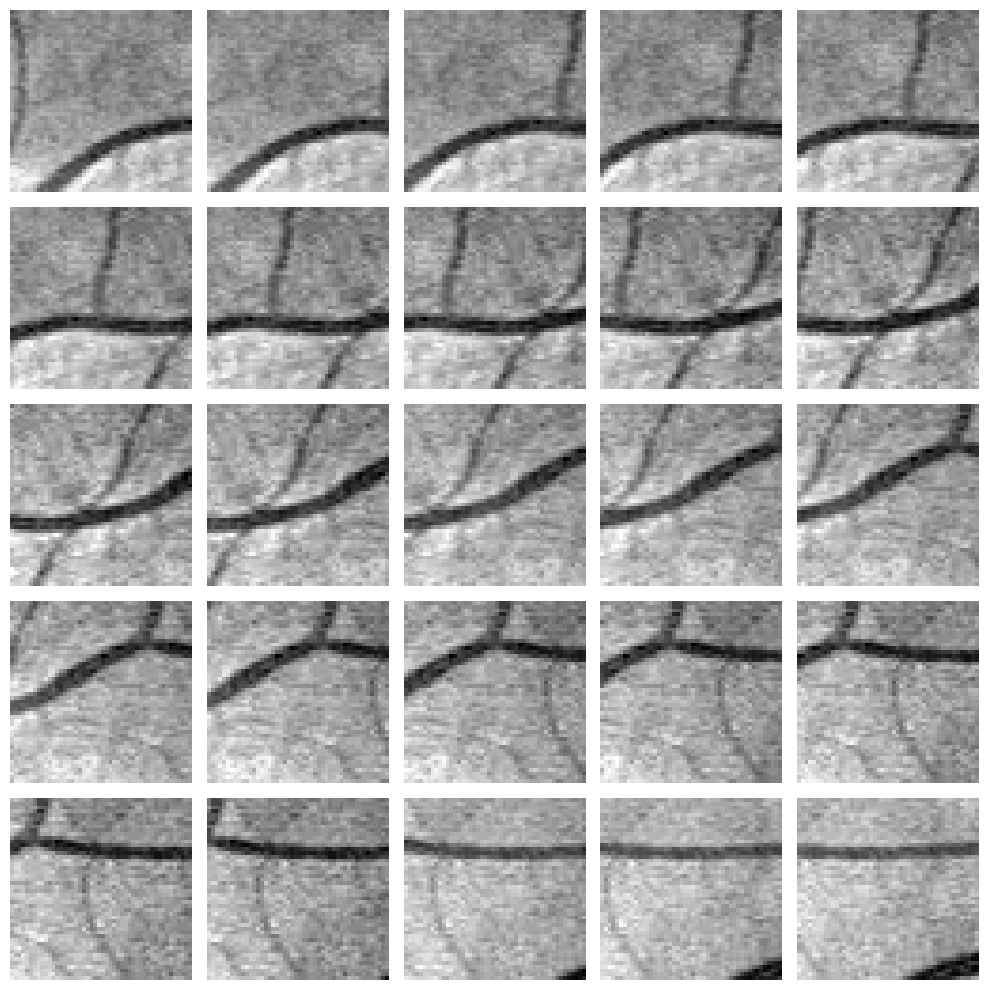

In [84]:
#plot first middle 25 patches
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
ax = ax.ravel()
for i in range(25):
    ax[i].imshow(patch_imgs[i + 1000].numpy().transpose(1, 2, 0), cmap='gray')
    ax[i].axis('off')
plt.tight_layout()
plt.show()
